# Evaluate Exercises

1. Load the tips dataset from either pydataset or seaborn.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from scipy import stats
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
from pydataset import data

df = data('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

- Modify and add to the code above as necessary for it to work with the tips dataset.

In [3]:
ols_model = LinearRegression().fit(df[['total_bill']], df[['tip']])

In [4]:
df['yhat'] = ols_model.predict(df[['total_bill']])
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822


In [5]:
# 3. Plot the residuals for the linear regression model that you made.

df['residual'] = df.yhat - df.tip
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,residual
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,1.694636
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,0.346223
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,-0.373165
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,0.097250
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,-0.107178


<AxesSubplot:xlabel='total_bill', ylabel='residual'>

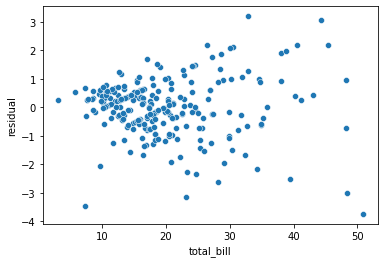

In [6]:
sns.scatterplot(data=df, x='total_bill', y='residual')

4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [11]:
df['residual^2'] = df.residual**2
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,residual,residual^2
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,1.694636,2.871792
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,0.346223,0.119870
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,-0.373165,0.139252
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,0.097250,0.009458
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,-0.107178,0.011487


In [13]:
# Sum of squared error
sse = df['residual^2'].sum()
sse

252.788743850776

In [14]:
# find the mean squared error
mse = sse/len(df)
mse

1.036019442011377

In [15]:
# find the root mean squared error
rmse = sqrt(mse)
rmse

1.0178504025697377

In [16]:
# create baseline to find ess and tss
df['baseline'] = df.tip.mean()
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,residual,residual^2,baseline
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,1.694636,2.871792,2.998279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,0.346223,0.119870,2.998279
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,-0.373165,0.139252,2.998279
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,0.097250,0.009458,2.998279
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,-0.107178,0.011487,2.998279


In [17]:
# set residual_baseline
df['residual_baseline'] = df.baseline - df.tip
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,residual,residual^2,baseline,residual_baseline
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,1.694636,2.871792,2.998279,1.988279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,0.346223,0.119870,2.998279,1.338279
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,-0.373165,0.139252,2.998279,-0.501721
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,0.097250,0.009458,2.998279,-0.311721
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,-0.107178,0.011487,2.998279,-0.611721


In [18]:
# set residual_baseline2
df['residual_baseline^2'] = df.residual_baseline ** 2
df.head()


,total_bill,tip,sex,smoker,day,time,size,yhat,residual,residual^2,baseline,residual_baseline,residual_baseline^2
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,1.694636,2.871792,2.998279,1.988279,3.953252
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,0.346223,0.119870,2.998279,1.338279,1.790990
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,-0.373165,0.139252,2.998279,-0.501721,0.251724
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,0.097250,0.009458,2.998279,-0.311721,0.097170
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,-0.107178,0.011487,2.998279,-0.611721,0.374203


In [25]:
# set ess
ess = sum((df.yhat - df.tip.mean())**2)
ess

212.4237331984042

In [29]:
# set tss
tss = sum((df.tip - df.tip.mean())**2)
tss

465.21247704918085

In [30]:
ess+sse

465.21247704918017

5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

7. What is the amount of variance explained in your model?

8. Is your model better than the baseline model?

9. Create a file named evaluate.py that contains the following functions.
- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

10. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.